In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import pelt, apart

pi = np.pi
np.random.seed(123)

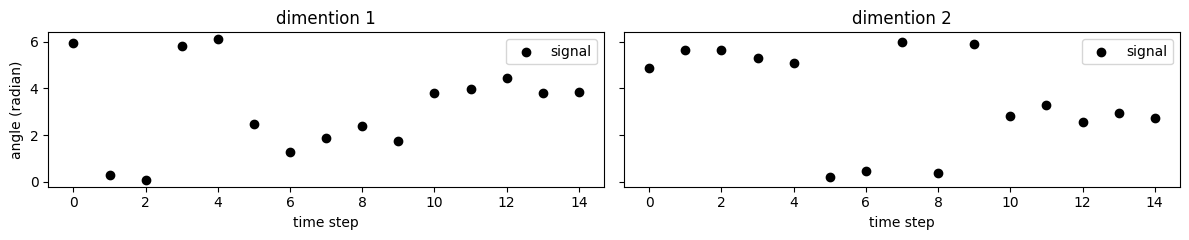

In [2]:
# create 2D angular signal
signal_1 = np.concatenate([np.random.normal(m, 0.3, 5) for m in [0, 2, 4]])
signal_2 = np.concatenate([np.random.normal(m, 0.3, 5) for m in [5, 0, 3]])
signal   = np.column_stack((signal_1, signal_2))

# shift the signal into [0, 2pi)
signal[signal < 0]    += 2*pi
signal[signal > 2*pi] -= 2*pi

# plot signal
fig, axs = plt.subplots(1, 2, figsize=(12, 2.5), sharex=True, sharey=True)
for i in range(2):
    axs[i].scatter(np.arange(len(signal)), signal[:, i], color='black', label='signal')
    axs[i].set_xlabel("time step")
    axs[i].set_title(f"dimention {i+1}")
    axs[i].legend(loc='best')
axs[0].set_ylabel("angle (radian)")
plt.tight_layout()
plt.show()

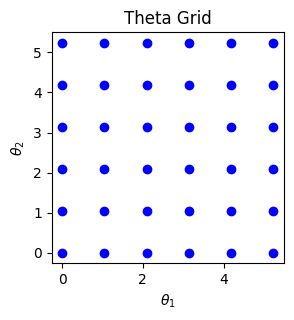

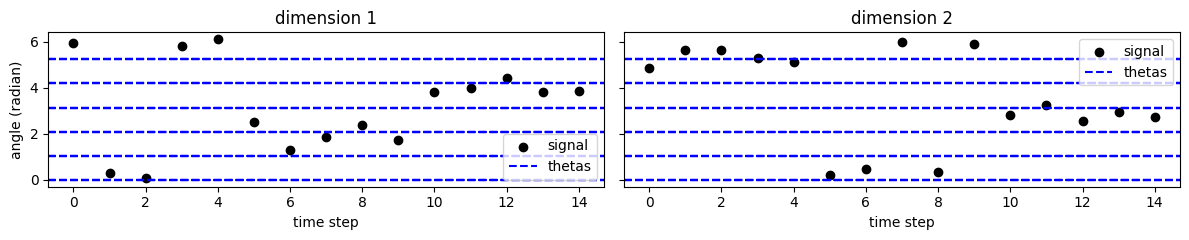

In [3]:
# discrete means set
Theta = np.array(np.meshgrid(np.linspace(0, 2*np.pi, 6, endpoint=False),
                             np.linspace(0, 2*np.pi, 6, endpoint=False),
                             indexing='ij')).reshape(2, -1).T

# Plot grid
plt.figure(figsize=(3, 3))
plt.scatter(Theta[:, 0], Theta[:, 1], color='blue')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Theta Grid')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 2.5), sharex=True, sharey=True)
for i in range(2):
    axs[i].scatter(range(len(signal)), signal[:, i], color='black', label='signal')
    for j, theta in enumerate(Theta):
        axs[i].axhline(y=theta[i], color='blue', linestyle='--', label='thetas' if j == 0 else "")
    axs[i].set_xlabel('time step')
    axs[i].set_title(f'dimension {i+1}')
    axs[i].legend(loc='best')
axs[0].set_ylabel('angle (radian)')
plt.tight_layout()
plt.show()

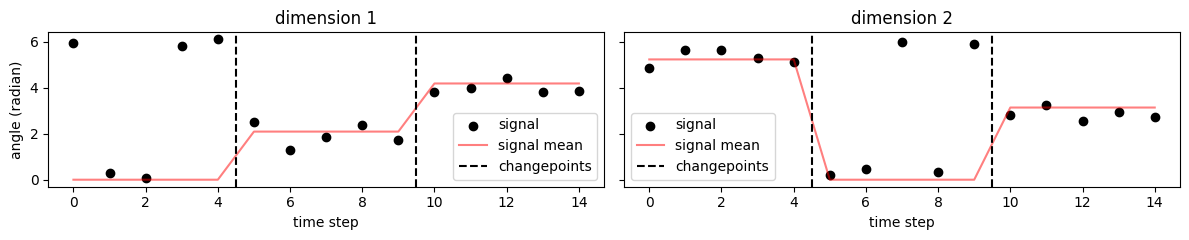

In [4]:
# optimal partitioning
lda = 0.5
chpnts, signal_mean = pelt(signal, Theta, lda)

# plotting solution
fig, axs = plt.subplots(1, 2, figsize=(12, 2.5), sharex=True, sharey=True)
for i in range(2):
    axs[i].scatter(range(len(signal)), signal[:, i], color='black', label='signal')
    axs[i].plot(signal_mean[:, i], color='red', alpha=0.5, label='signal mean')
    for j, cp in enumerate(chpnts):
        axs[i].axvline(x=cp + 0.5, color='black', linestyle='--', label='changepoints' if j == 0 else "")
    axs[i].set_xlabel('time step')
    axs[i].set_title(f'dimension {i+1}')
    axs[i].legend(loc='best')
axs[0].set_ylabel('angle (radian)')
plt.tight_layout()
plt.show()

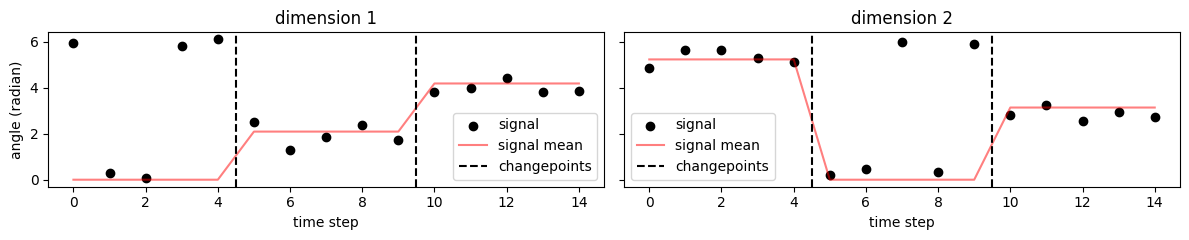

In [5]:
# optimal partitioning
lda = 0.5
chpnts, signal_mean = apart(signal, Theta, lda)

# plotting solution
fig, axs = plt.subplots(1, 2, figsize=(12, 2.5), sharex=True, sharey=True)
for i in range(2):
    axs[i].scatter(range(len(signal)), signal[:, i], color='black', label='signal')
    axs[i].plot(signal_mean[:, i], color='red', alpha=0.5, label='signal mean')
    for j, cp in enumerate(chpnts):
        axs[i].axvline(x=cp + 0.5, color='black', linestyle='--', label='changepoints' if j == 0 else "")
    axs[i].set_xlabel('time step')
    axs[i].set_title(f'dimension {i+1}')
    axs[i].legend(loc='best')
axs[0].set_ylabel('angle (radian)')
plt.tight_layout()
plt.show()